In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
import requests
import math
import re
import csv
import mplhep as hep

## Comparing Run 2 and Run 3 trigger rates: checking single- and double-objects seeds representative of each object type

#### Ephemeral ZeroBias 2022 (Run D) - run 357688: 4819637 events (in LS = [35,84] for PU=52: events)                                                                                                                                                                      
L1Ntuples ZB2022: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBdata_run357688

#### Ephemeral ZeroBias 2018 (Run D) - run 325097: 672287 events (in LS=[58,93] for PU=52: events)                                                                                                                                                                        
L1Ntuples ZB2018: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBdata_run325097


In [73]:
# Tot events for normalization
tot_nevents_ZB2022 = 4819637
tot_nevents_ZB2018 = 672287  
tot_nevents_LS_ZB2022 = 4112806
tot_nevents_LS_ZB2018 = 239737 

# Lists for rate computation
rate_muon_algo_Run3 = []
rate_muon_algo_Run2 = []
rate_muon_algo_LS_Run3 = []
rate_muon_algo_LS_Run2 = []

rate_eg_algo_Run3 = []
rate_eg_algo_Run2 = []
rate_eg_algo_LS_Run3 = []
rate_eg_algo_LS_Run2 = []

# Algorithms and thresholds
muon_algo = ['L1_SingleMu22', 'L1_SingleMu25']
mu_thr = [22, 25]
eg_algo = ['L1_SingleEG36_er2p5', 'L1_SingleEG38_er2p5', 'L1_SingleEG40_er2p5']
eg_thr = [36, 38, 40]

nFired_muon_algo_Run3 = [70108, 60672]
nFired_muon_algo_Run2 = [9937, 8285]
nFired_muon_algo_LS_Run3 = [11354, 9821]
nFired_muon_algo_LS_Run2 = [7113, 5947]

nFired_eg_algo_Run3 = [5468, 4601, 3887]
nFired_eg_algo_Run2 = [890, 749, 639]
nFired_eg_algo_LS_Run3 = [880, 742, 643]
nFired_eg_algo_LS_Run2 = [661, 560, 480]
    
for mu in range(len(muon_algo)):
    #print("Ratio nFired/nTot = ", nFired_muon_algo_Run3[mu]/tot_nevents_ZB2022)
    #print("Ratio nFired/nTot = ", nFired_muon_algo_Run3[mu]/tot_nevents_ZB2022)
    #print("Rate = ", nFired_muon_algo_Run3[mu]/tot_nevents_ZB2022*2748*11.246)
    #print("Rate = ", nFired_muon_algo_Run3[mu]/tot_nevents_ZB2022*2748*11.246)
    rate_muon_algo_Run3.append(nFired_muon_algo_Run3[mu]/tot_nevents_ZB2022*11.246)
    rate_muon_algo_Run2.append(nFired_muon_algo_Run2[mu]/tot_nevents_ZB2022*11.246)
    rate_muon_algo_LS_Run3.append(nFired_muon_algo_LS_Run3[mu]/tot_nevents_ZB2022*11.246)
    rate_muon_algo_LS_Run2.append(nFired_muon_algo_LS_Run2[mu]/tot_nevents_ZB2022*11.246)
for eg in range(len(eg_algo)):
    rate_eg_algo_LS_Run3.append(nFired_eg_algo_LS_Run3[eg]/tot_nevents_ZB2022*11.246)
    rate_eg_algo_LS_Run2.append(nFired_eg_algo_LS_Run2[eg]/tot_nevents_ZB2022*11.246)

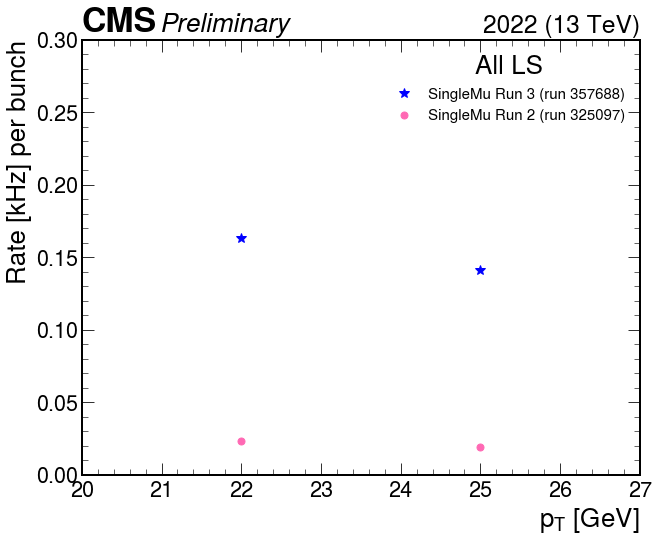

In [74]:
p_muon_Run3, p_muon_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_Run3 = plt.plot(mu_thr, rate_muon_algo_Run3, '*', color="blue", markersize=10, label = "SingleMu Run 3 (run 357688)")
p_muon_Run2 = plt.plot(mu_thr, rate_muon_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleMu Run 2 (run 325097)")


plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(20., 27.)
plt.ylim(0., 0.3)
plt.legend(loc='upper right', title="All LS", fontsize='xx-small')
#plt.tight_layout()
plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

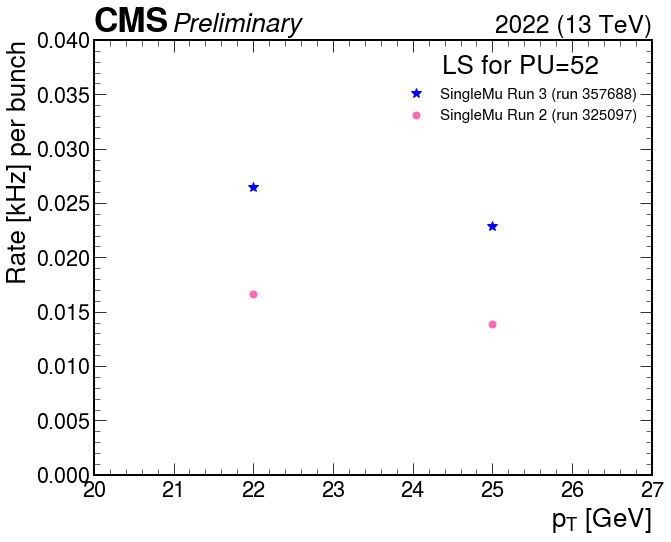

In [81]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_muon_LS_Run3 = plt.plot(mu_thr, rate_muon_algo_LS_Run3, '*', color="blue", markersize=10, label = "SingleMu Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_thr, rate_muon_algo_LS_Run2, '.', color="hotpink", markersize=14, label = "SingleMu Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(20., 27.)
plt.ylim(0., 0.04)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

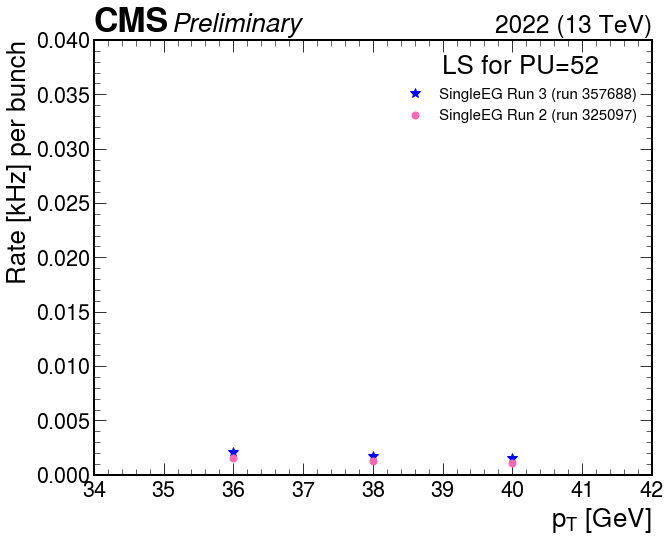

In [82]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_eg_LS_Run3 = plt.plot(eg_thr, rate_eg_algo_LS_Run3, '*', color="blue", markersize=10, label = "SingleEG Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_thr, rate_eg_algo_LS_Run2, '.', color="hotpink", markersize=14, label = "SingleEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(34., 42.)
plt.ylim(0., 0.04)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)